# Pizza Dataset
This dataset contains the information [PizzaSales](https://www.kaggle.com/datasets/anuragtupate/pizza-data-dashboard-for-practice) Also contain order id of pizza, different categories of pizza, sizes of pizza , and name of different types of pizza. In this notebook, we are going to find the answers to questions like:
*  What is the most commonly ordered pizza size? 
*  What is the distribution of pizza sales over time?
*  What are the most popular pizza names among the customers?

# Installing required packages and load library

In [1]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggplot2")
library(tidyverse)
library(dplyr)
library(ggplot2)
library(readxl)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘dplyr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installi

# Reading our dataset
Our pizza sale file is in the excel format(.xlsx), note that we have to use the function according to the format of our file like CSV, XLSX and TXT. Also make sure to import the file which you have to use before applying any fuctions.

In [7]:
# Read the file and store it in the variable called pizza_sales
pizza_sales <- read_excel("../input/pizza-data-dashboard-for-practice/pizza_sales_excel_file.xlsx")

#To view first 10 columns of our data
glimpse(pizza_sales)

Rows: 48,620
Columns: 12
$ pizza_id          <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1…
$ order_id          <dbl> 1, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 9, 9…
$ pizza_name_id     <chr> "hawaiian_m", "classic_dlx_m", "five_cheese_l", "ita…
$ quantity          <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ order_date        <dttm> 2015-01-01, 2015-01-01, 2015-01-01, 2015-01-01, 201…
$ order_time        <dttm> 1899-12-31 11:38:36, 1899-12-31 11:57:40, 1899-12-3…
$ unit_price        <dbl> 13.25, 16.00, 18.50, 20.75, 16.00, 20.75, 16.50, 20.…
$ total_price       <dbl> 13.25, 16.00, 18.50, 20.75, 16.00, 20.75, 16.50, 20.…
$ pizza_size        <chr> "M", "M", "L", "L", "M", "L", "M", "L", "M", "M", "S…
$ pizza_category    <chr> "Classic", "Classic", "Veggie", "Supreme", "Veggie",…
$ pizza_ingredients <chr> "Sliced Ham, Pineapple, Mozzarella Cheese", "Peppero…
$ pizza_name        <chr> "The Hawaiian Pizza", "The Classic Deluxe Pizza", "T…


# Total revenue of pizza sales
## Exploritng sizes of pizza
Here, first we find out what are the different sizes of pizza available.

In [8]:
pizza_sales %>% 
  distinct(pizza_size)

pizza_size
<chr>
M
L
S
XL
XXL


Then we create the bar chart using geom_bar function of ggplot , we put pizza_size on x-axis and we automatically get the count of pizza_size on y-axis. By doing this we easily find out which size of pizza is most commonly ordered. so, the Large size of pizza’s are most likely to ordered by people.

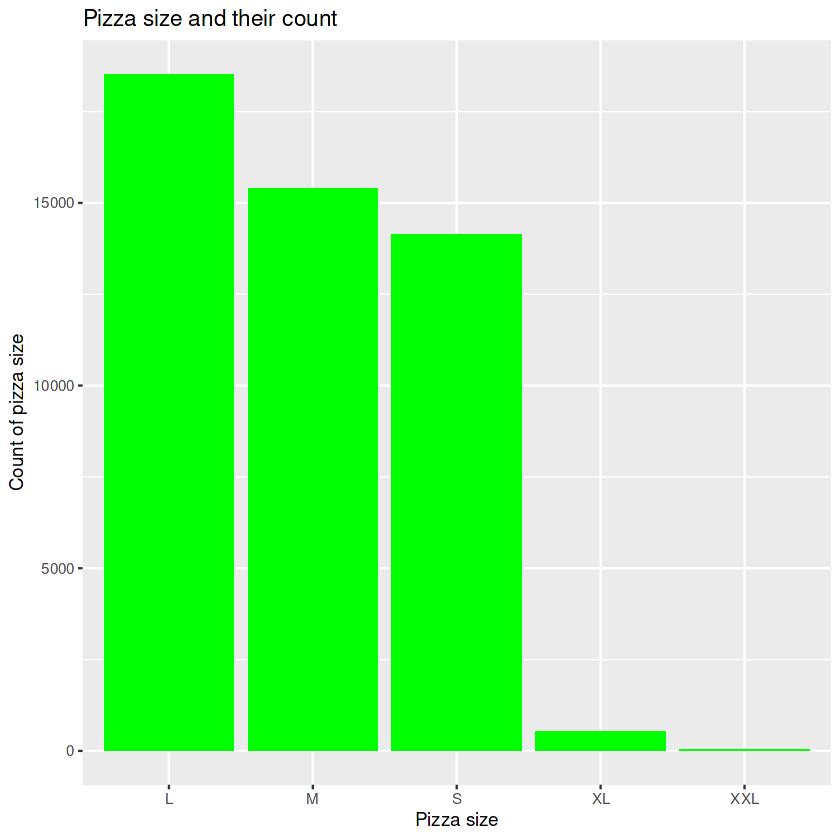

In [9]:
ggplot(data = pizza_sales)+
  geom_bar(aes(x=pizza_size),fill="green")+
  labs(x= "Pizza size",y="Count of pizza size", title ="Pizza size and their count")

Exploring categories of pizza. Now , we explore different categories of pizza. we plot the bar chart of pizza size and their count . And then by using facet_warp() function we create seperate plot for each category of pizza.

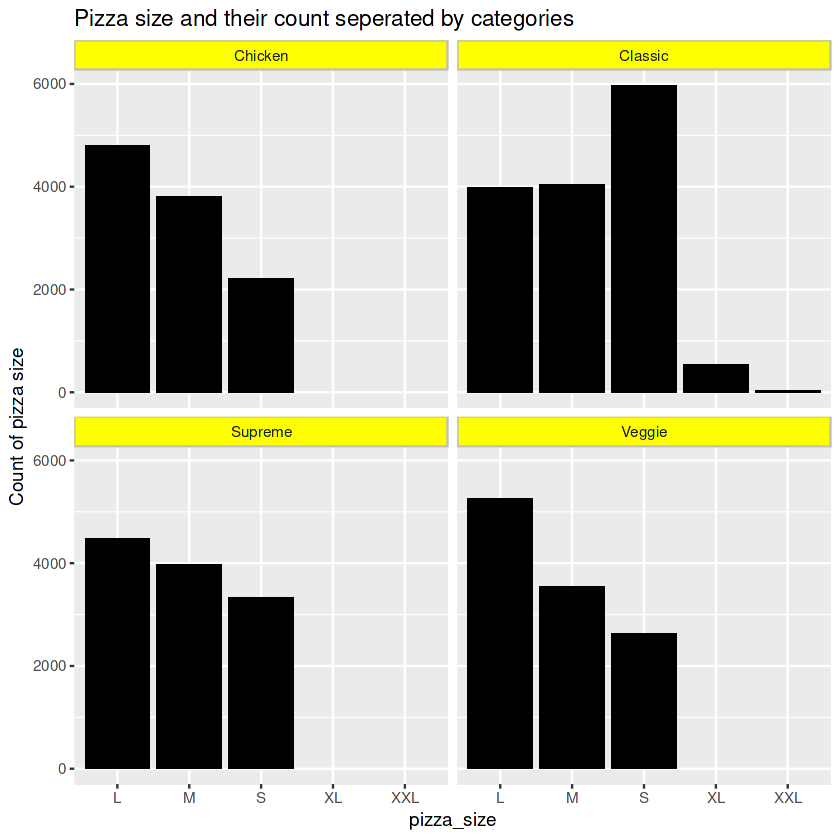

In [10]:
ggplot(data = pizza_sales)+
  geom_bar(aes(x=pizza_size), fill="black")+
  facet_wrap(~pizza_category)+
  theme(legend.position="none",
      strip.background=element_rect(colour="grey",
                                    fill="yellow"))+
  labs(title = "Pizza size and their count seperated by categories",x = "pizza_size",
       y="Count of pizza size")

## Distribution of pizza sales over time
As We don't have the seperate column, which show only months. we have to format the existing column order_date to show only months and stored it in new column called order_month, using mutate function.Storing result in dataset so that our original dataset is updated.

In [12]:
pizza_sales <- pizza_sales %>% 
  mutate(order_month = format(order_date,"%B")) %>%  # extract month from order_date
  mutate(order_year = format(order_date,"%Y")) # extract year from order_date

# check our dataset whether or not it includes new columns.
head(pizza_sales)

pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,order_month,order_year
<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,hawaiian_m,1,2015-01-01,1899-12-31 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,2015
2,2,classic_dlx_m,1,2015-01-01,1899-12-31 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon",The Classic Deluxe Pizza,January,2015
3,2,five_cheese_l,1,2015-01-01,1899-12-31 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic",The Five Cheese Pizza,January,2015
4,2,ital_supr_l,1,2015-01-01,1899-12-31 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic",The Italian Supreme Pizza,January,2015
5,2,mexicana_m,1,2015-01-01,1899-12-31 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic",The Mexicana Pizza,January,2015
6,2,thai_ckn_l,1,2015-01-01,1899-12-31 11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce",The Thai Chicken Pizza,January,2015


## Monthly distribution using line graph

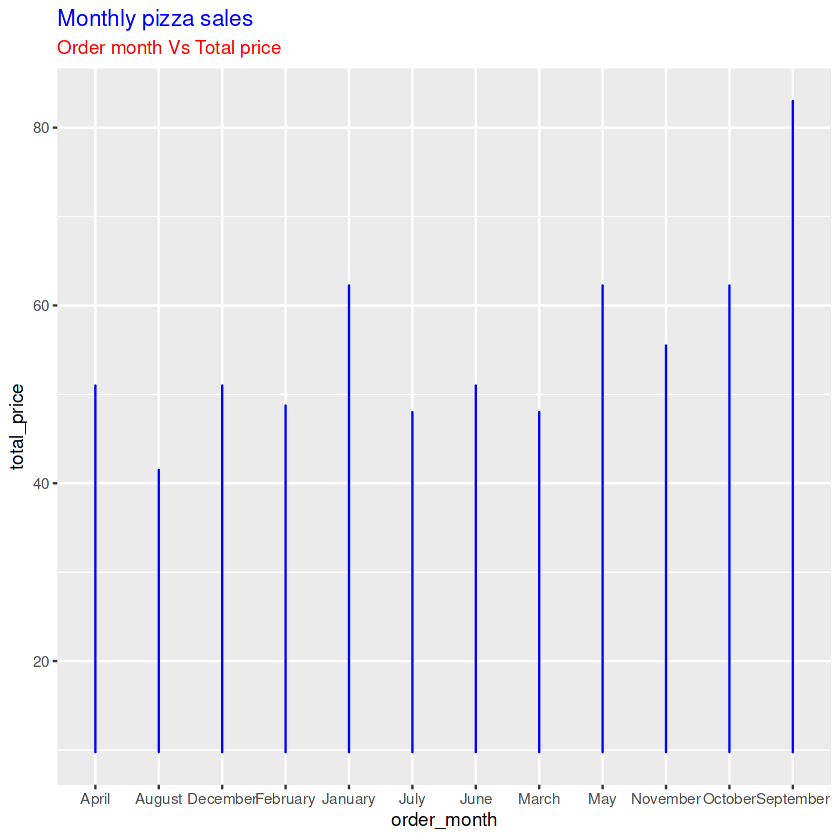

In [13]:
ggplot(data = pizza_sales, aes(x=order_month, y=total_price))+
  geom_line(color = "blue")+
  labs(title="Monthly pizza sales", subtitle ="Order month Vs Total price")+
  theme(plot.title = element_text(color = "blue"), plot.subtitle = element_text(color = "red"))

## Most popular pizza names among the customers.

In [14]:
pizza_popularity <- pizza_sales %>%
  group_by(pizza_category) %>%
  summarize(count = n()) %>%
  arrange(desc(count)) 

pizza_popularity

pizza_category,count
<chr>,<int>
Classic,14579
Supreme,11777
Veggie,11449
Chicken,10815


## Visual representation of most popular pizza category.

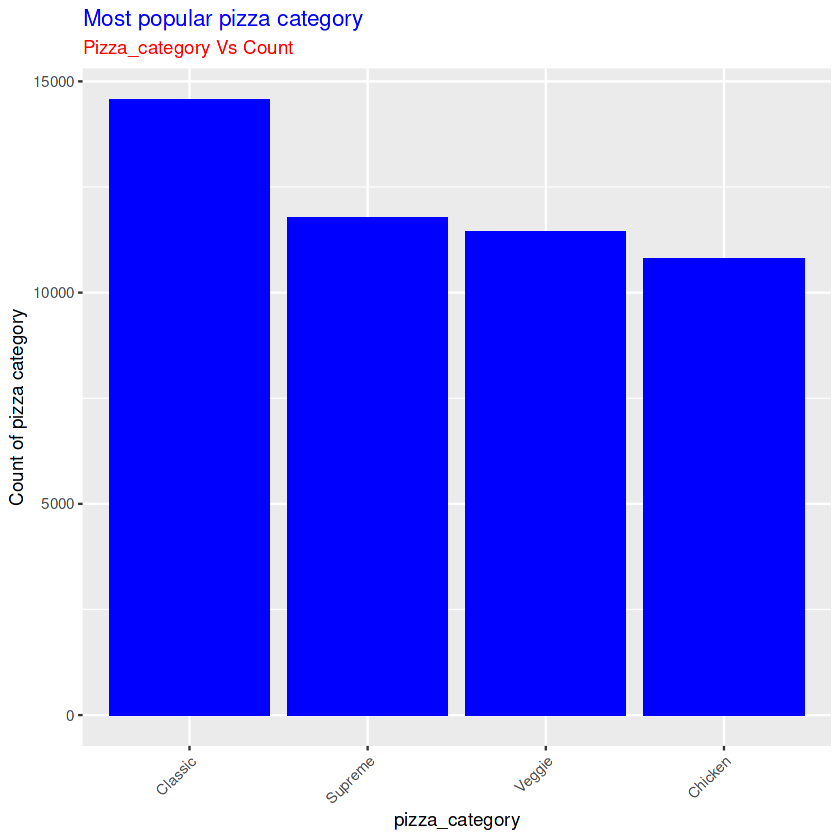

In [15]:
ggplot(pizza_popularity, aes(x = reorder(pizza_category, -count), y = count)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "pizza_category", y = "Count of pizza category", title = "Most popular pizza category", subtitle = "Pizza_category Vs Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),plot.title = element_text(color = "blue"),
          plot.subtitle = element_text(color = "red"))